# Generating web server logs

In [101]:
#Importing Libraries
import csv
import random
import datetime

In [102]:
#Status codes and viewer URL's
status_codes= [200, 201, 400, 401, 403, 404, 500] 
urls= [
    "/cycling-road/",
    "/archery/",
    "/athletics/",
    "/boxing/",
    "/swimming/",
    "/judo/",
    "/karate/",
    "/tennis/"
]

In [103]:
#Generating random IP adresses
def generate_ip_address():
    return f'{random.randint(1,255)}.{random.randint(1,255)}.{random.randint(1,255)}.{random.randint(1,255)}'


In [104]:
#Generting random time
def generate_timestamp():
    current_time =datetime.datetime.now()
    random_time =current_time - datetime.timedelta(seconds= random.randint(1, 86400))
    return random_time.strftime("%H:%M:%S %z")

In [105]:
#Generating web server log entries
def generate_log_entry():
    ip_address = generate_ip_address()
    timestamp =  generate_timestamp()  
    http_method = 'GET'  
    url= random.choice(urls)
    http_version = 'Https://www.Olymipcs.com/watch'
    status_code = random.choice(status_codes)
    return [ip_address,timestamp, f'"{http_version} {url} {http_method}"', status_code]

In [106]:
#Number of entries in CSV file
num_entries = 3000

In [107]:
#Generate Lig entries
log_entries =[generate_log_entry() for i in range(num_entries)]

In [108]:
#Saving web server logs as CSV
with open('web_server_logs.csv', 'w', newline='') as f:
    writer= csv.writer(f)
    writer.writerow(['IP_Address', 'Timestamp', 'Request','Status'])
    writer.writerows(log_entries)

# Data Ingestion

In [109]:
#Importing libraries
import pandas as pd

In [110]:
#loading dataset into dataframe
df = pd.read_csv('web_server_logs.csv')

# Exploratory data analysis

In [111]:
#Checking data frame head
df.head()

,IP_Address,Timestamp,Request,Status
0,227.209.24.49,10:45:58,"""Https://www.Olymipcs.com/watch /boxing/ GET""",400
1,161.234.25.96,18:51:48,"""Https://www.Olymipcs.com/watch /athletics/ GET""",401
2,73.182.118.194,14:08:56,"""Https://www.Olymipcs.com/watch /swimming/ GET""",201
3,198.223.127.149,14:43:57,"""Https://www.Olymipcs.com/watch /swimming/ GET""",403
4,221.61.219.77,09:58:12,"""Https://www.Olymipcs.com/watch /cycling-road/...",500


In [112]:
#Getting dataframe info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   IP_Address  3000 non-null   object
 1   Timestamp   3000 non-null   object
 2   Request     3000 non-null   object
 3   Status      3000 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 93.9+ KB


In [113]:
#Getting dataframe shape
df.shape

(3000, 4)

In [114]:
#Checking for unique values
df.nunique()

IP_Address    3000
Timestamp     2945
Request          8
Status           7
dtype: int64

# Data cleaning

In [115]:
#Checking for duplictes
df.duplicated().sum()

0

In [116]:
#Checking for null values
df.isna().sum()

IP_Address    0
Timestamp     0
Request       0
Status        0
dtype: int64

In [117]:
#Removing excess text from URL's
df["Request"]= df["Request"].str.split("/").str[4]
df.head()

,IP_Address,Timestamp,Request,Status
0,227.209.24.49,10:45:58,boxing,400
1,161.234.25.96,18:51:48,athletics,401
2,73.182.118.194,14:08:56,swimming,201
3,198.223.127.149,14:43:57,swimming,403
4,221.61.219.77,09:58:12,cycling-road,500


# Data transformation

In [118]:
#Pulling viewers country of origin from IP address
import geoip2.database

reader= geoip2.database.Reader('GeoLite2-Country.mmdb')
def get_country(ip):
    try:
        response =reader.country(ip)
        return response.country.name
    except:
        return None
    
df['Country']=df['IP_Address'].apply(get_country)    
reader.close()

In [119]:
#Checking for country colum
df.head()

,IP_Address,Timestamp,Request,Status,Country
0,227.209.24.49,10:45:58,boxing,400,None
1,161.234.25.96,18:51:48,athletics,401,Venezuela
2,73.182.118.194,14:08:56,swimming,201,United States
3,198.223.127.149,14:43:57,swimming,403,United States
4,221.61.219.77,09:58:12,cycling-road,500,Japan


In [120]:
#Checking for null values once more
df.isna().sum()

IP_Address      0
Timestamp       0
Request         0
Status          0
Country       442
dtype: int64

In [121]:
#Adding column to display the hour of veiwer activity
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df['Hour'] = df['Timestamp'].dt.strftime('%H')
df.head()

,IP_Address,Timestamp,Request,Status,Country,Hour
0,227.209.24.49,2023-08-30 10:45:58,boxing,400,None,10
1,161.234.25.96,2023-08-30 18:51:48,athletics,401,Venezuela,18
2,73.182.118.194,2023-08-30 14:08:56,swimming,201,United States,14
3,198.223.127.149,2023-08-30 14:43:57,swimming,403,United States,14
4,221.61.219.77,2023-08-30 09:58:12,cycling-road,500,Japan,09


In [122]:
#Removing null values
df.dropna(subset=['Country'], inplace= True)
df.isna().sum()

IP_Address    0
Timestamp     0
Request       0
Status        0
Country       0
Hour          0
dtype: int64

# Visualizations

In [123]:
import matplotlib.pyplot as plt

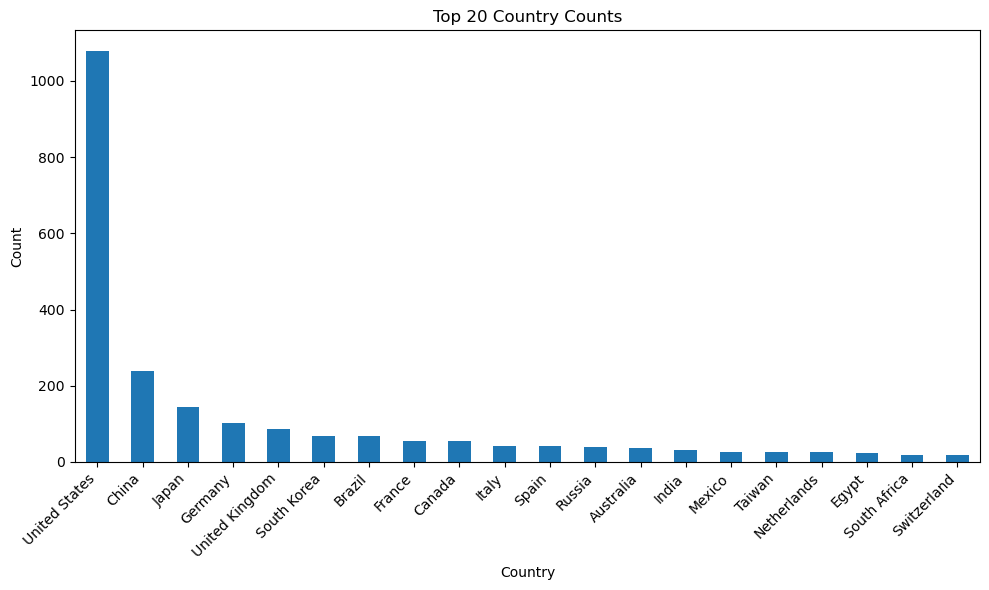

In [98]:
#Top 20 countries
country_counts = df['Country'].value_counts()

# Select the top 20 countries
top_countries = country_counts.head(20)

fig, ax = plt.subplots(figsize=(10, 6))
top_countries.plot(kind='bar', ax=ax)

ax.set_title('Top 20 Country Counts')
ax.set_xlabel('Country')
ax.set_ylabel('Count')
ax.set_xticklabels(top_countries.index, rotation=45, ha='right')

plt.tight_layout()
plt.show()

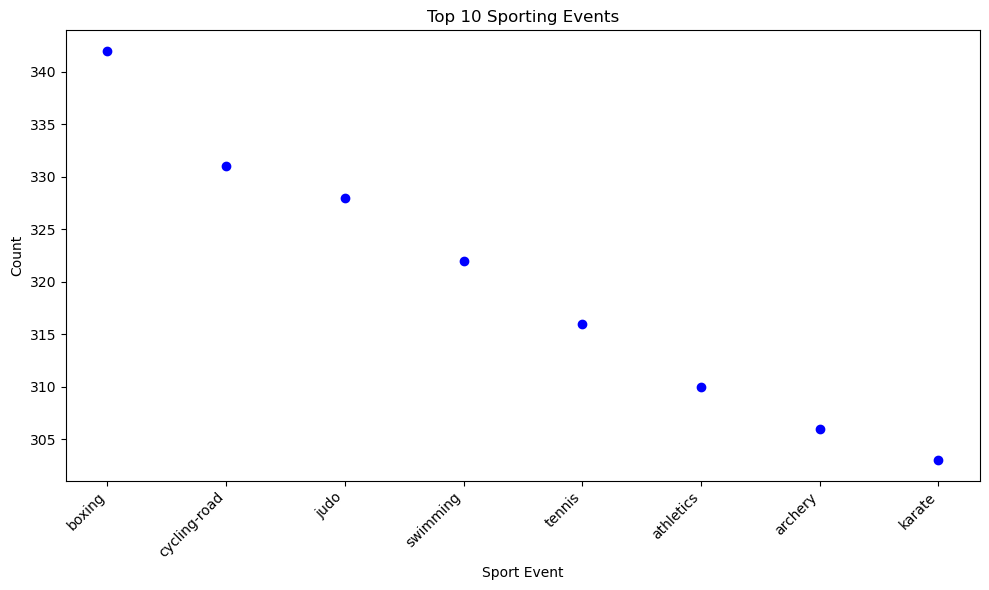

In [124]:
#Top 10 Sporting events

# Select the number of top events to consider
num_events = 10
sport_event_counts = df['Request'].value_counts()
top_sport_events = sport_event_counts.head(num_events)

fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(top_sport_events.index, top_sport_events.values, color='blue', marker='o')
ax.set_title('Top 10 Sporting Events')
ax.set_xlabel('Sport Event')
ax.set_ylabel('Count')


ax.set_xticks(range(len(top_sport_events)))
ax.set_xticklabels(top_sport_events.index, rotation=45, ha='right')
plt.tight_layout()
plt.show()

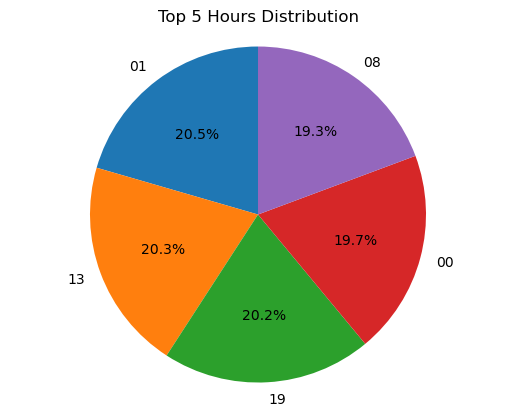

In [125]:
#Popular view times
num_top_values = 5

# Calculate the counts for each hour
hour_counts = df['Hour'].value_counts()
top_hours = hour_counts.head(num_top_values)
fig, ax = plt.subplots()
ax.pie(top_hours, labels=top_hours.index, autopct='%1.1f%%', startangle=90)
ax.axis('equal')  
ax.set_title('Top 5 Hours Distribution')
plt.show()

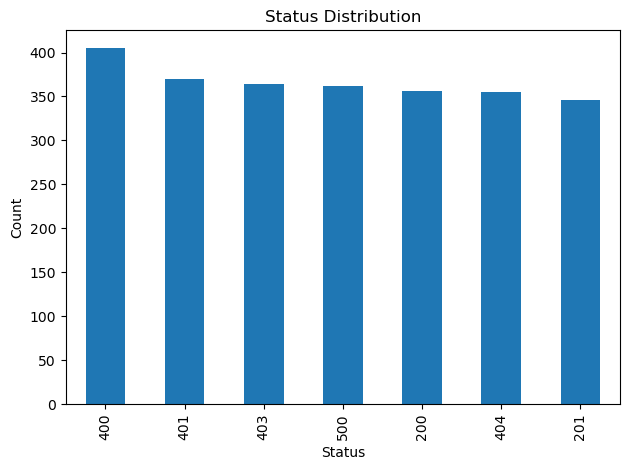

In [126]:
#Top status codes recieved by viewers
status_counts = df['Status'].value_counts()

# Create a bar plot using Matplotlib
fig, ax = plt.subplots()
status_counts.plot(kind='bar', ax=ax)
ax.set_title('Status Distribution')
ax.set_xlabel('Status')
ax.set_ylabel('Count')
plt.tight_layout()
plt.show()
